In [47]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline

In [48]:
y, sr = malaya_speech.load('naber.wav')
len(y), sr

(342698, 16000)

In [49]:
import IPython.display as ipd
ipd.Audio(y, rate = sr)

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\malaya_speech\utils\featurization.py:38: FutureWarning: Pass sr=16000, n_fft=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.mel_basis = librosa.filters.mel(


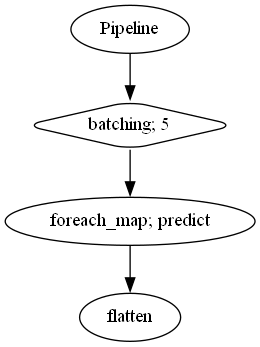

In [50]:
vad = malaya_speech.vad.deep_model(model = 'vggvox-v2')
frames = list(malaya_speech.utils.generator.frames(y, 30, sr))
p = Pipeline()
pipeline = (
    p.batching(5)
    .foreach_map(vad.predict)
    .flatten()
)
p.visualize()

In [51]:
result = p.emit(frames)
result.keys()

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=512 is too small for input signal of length=480
  return f(*args, **kwargs)
C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=512 is too small for input signal of length=458
  return f(*args, **kwargs)


dict_keys(['batching', 'predict', 'flatten'])

In [52]:
frames_vad = [(frame, result['flatten'][no]) for no, frame in enumerate(frames)]
grouped_vad = malaya_speech.utils.group.group_frames(frames_vad)
grouped_vad = malaya_speech.utils.group.group_frames_threshold(grouped_vad, threshold_to_stop = 0.3)
grouped_vad = malaya_speech.utils.group.group_frames(grouped_vad)

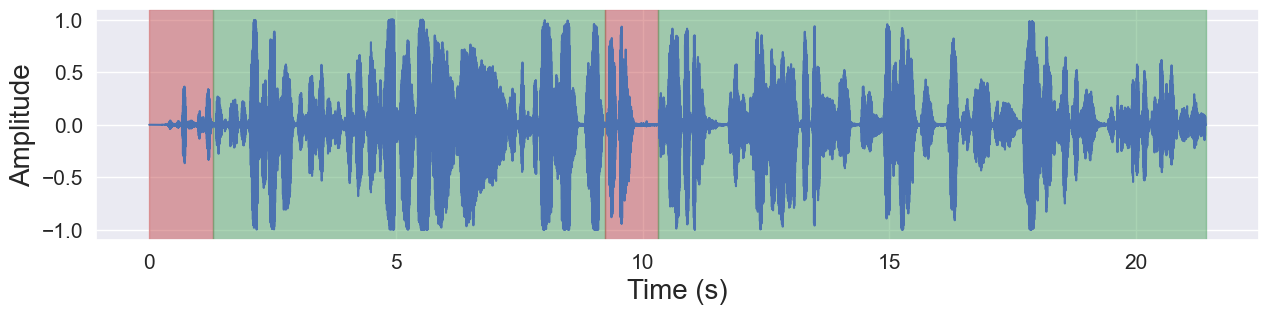

In [53]:
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr)

In [54]:
malaya_speech.speaker_change.available_model()

,Size (MB),Quantized Size (MB),Accuracy
vggvox-v2,31.1,7.92,0.63979
speakernet,20.3,5.18,0.64524


In [55]:
speakernet = malaya_speech.speaker_change.deep_model('speakernet')
vggvox_v2 = malaya_speech.speaker_change.deep_model('vggvox-v2')

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\malaya_speech\utils\featurization.py:38: FutureWarning: Pass sr=16000, n_fft=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.mel_basis = librosa.filters.mel(


In [56]:
frames = list(malaya_speech.utils.generator.frames(y, 500, sr))

In [57]:
probs_vggvox_v2 = [(frame, vggvox_v2.predict_proba([frame])[0, 1]) for frame in frames]

In [58]:
probs_speakernet = [(frame, speakernet.predict_proba([frame])[0, 1]) for frame in frames]

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

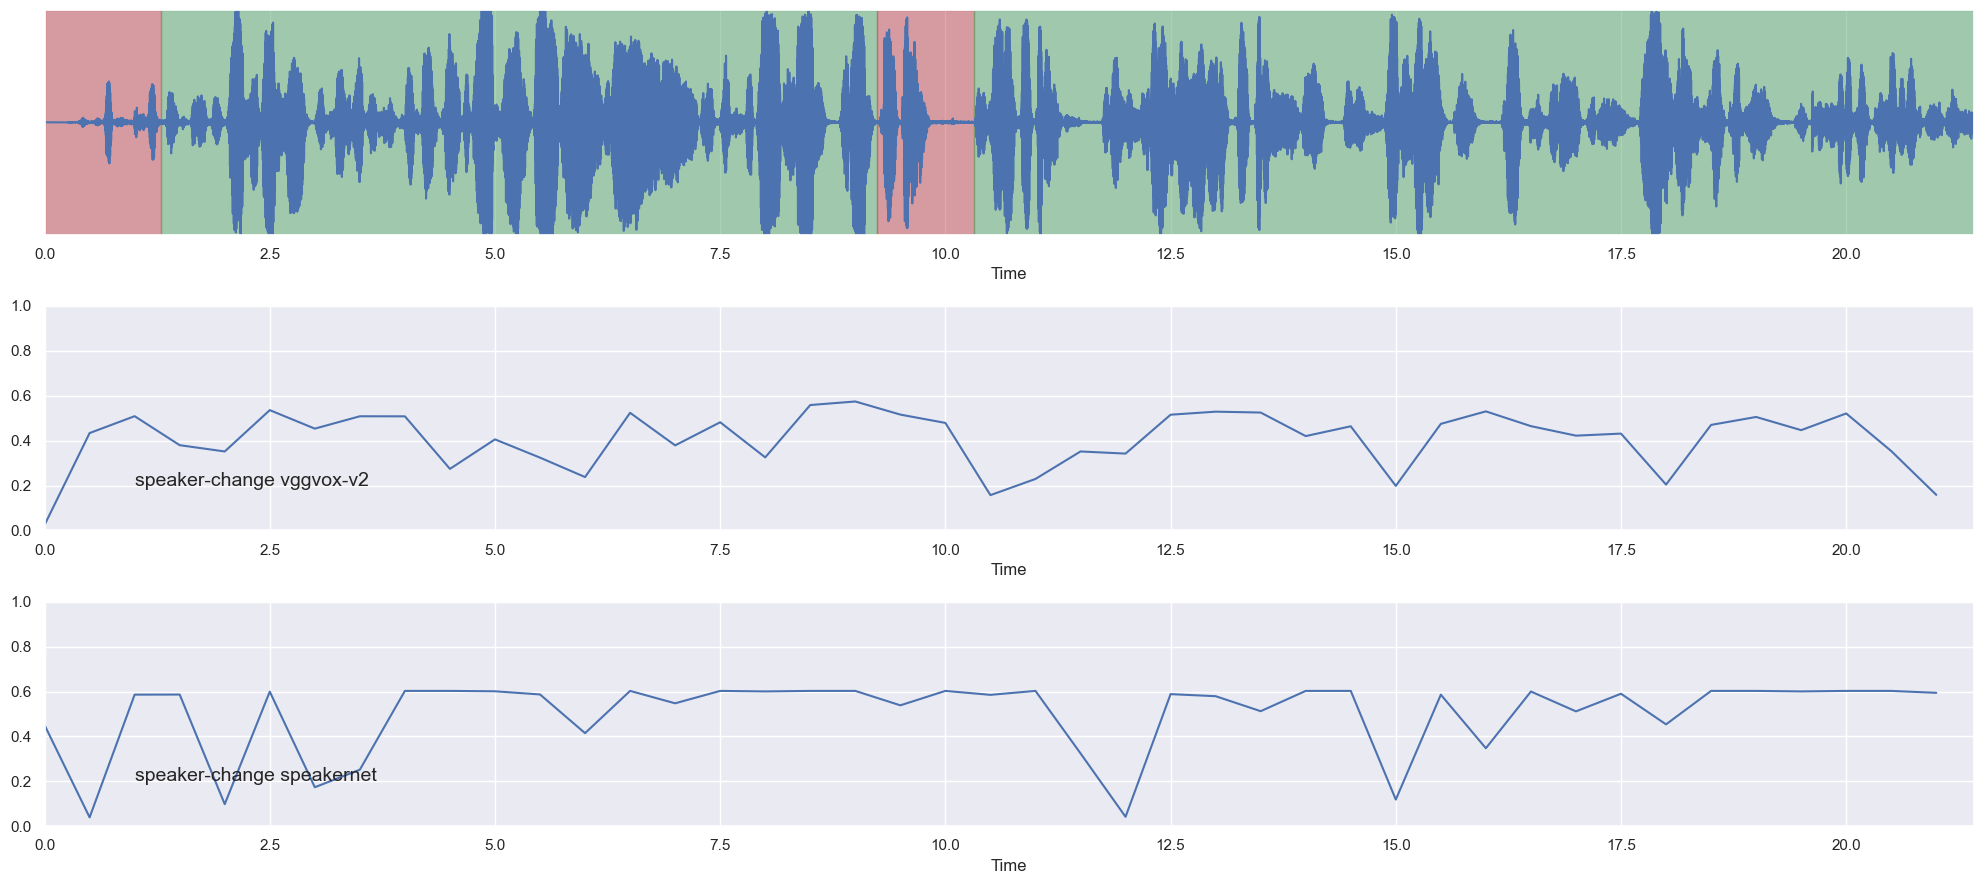

In [60]:
nrows = 3
fig, ax = plt.subplots(nrows = nrows, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 3)
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, ax = ax[0])
malaya_speech.extra.visualization.plot_classification(probs_vggvox_v2, 'speaker-change vggvox-v2', yaxis = True,
                                                     ax = ax[1])
malaya_speech.extra.visualization.plot_classification(probs_speakernet, 'speaker-change speakernet', yaxis = True,
                                                     ax = ax[2])
fig.tight_layout()
plt.show()

In [61]:
splitted_vggvox_v2 = malaya_speech.speaker_change.split_activities(grouped_vad, probs_vggvox_v2)
splitted_speakernet = malaya_speech.speaker_change.split_activities(grouped_vad, probs_speakernet)

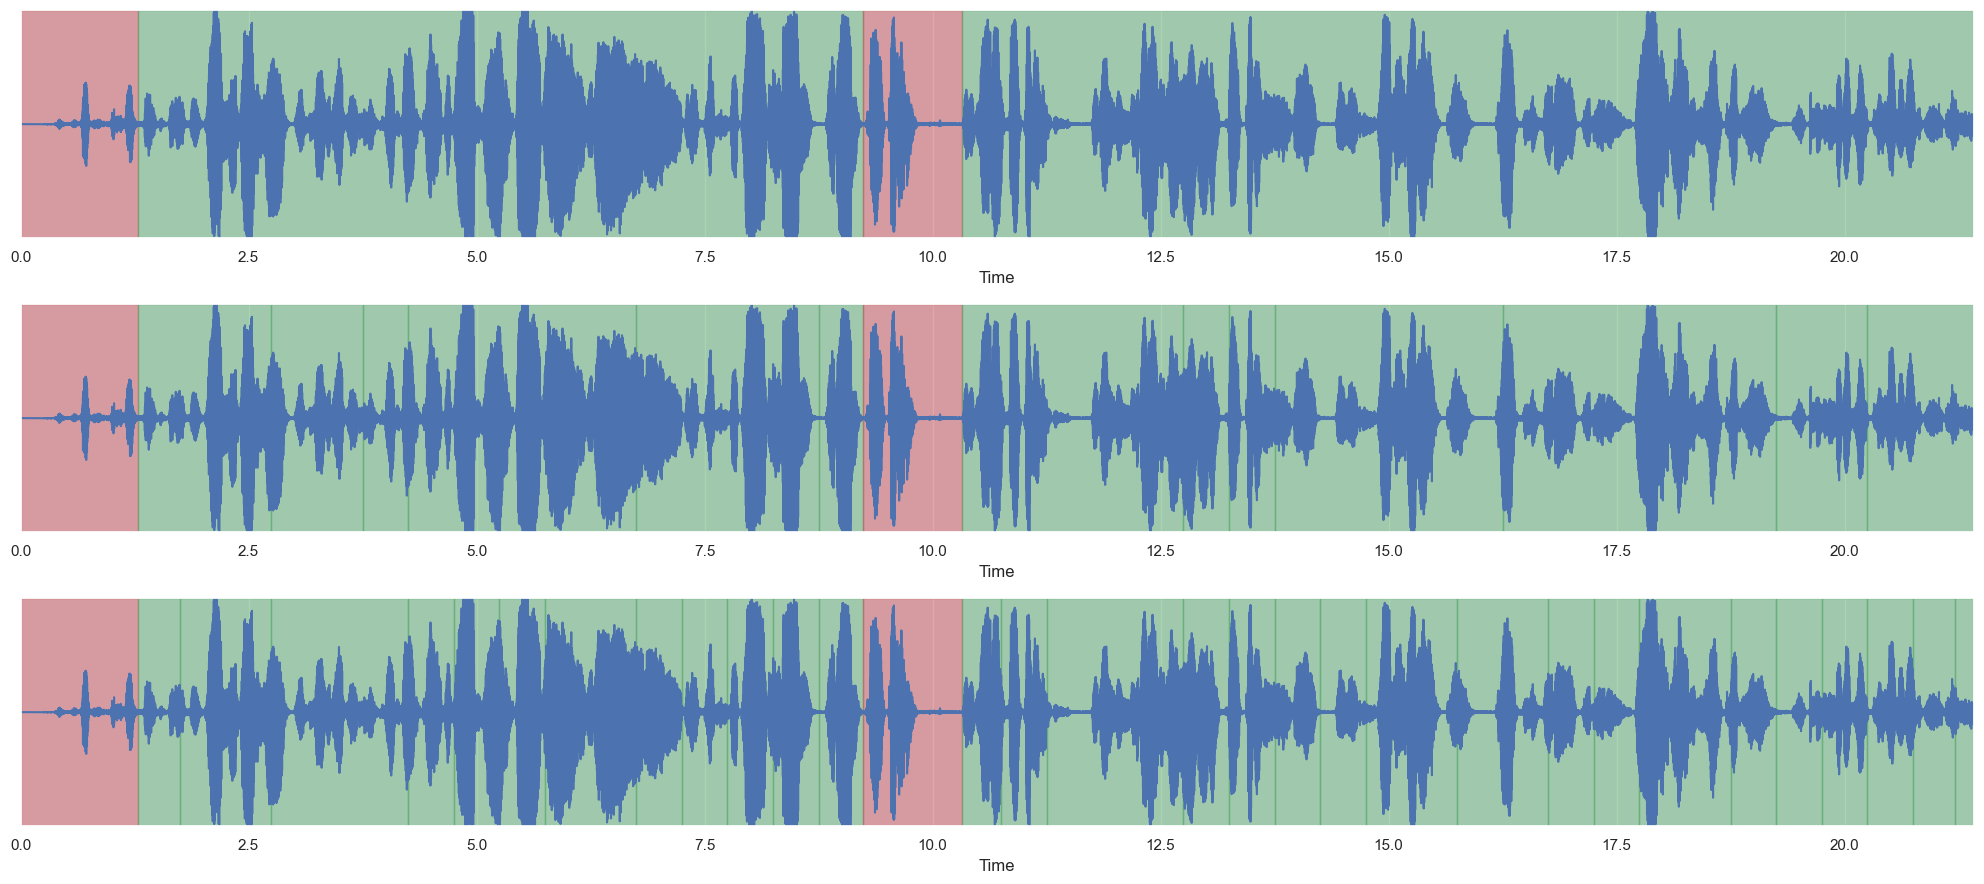

In [62]:
nrows = 3
fig, ax = plt.subplots(nrows = nrows, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 3)
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, ax = ax[0])
malaya_speech.extra.visualization.visualize_vad(y, splitted_vggvox_v2, sr, ax = ax[1])
malaya_speech.extra.visualization.visualize_vad(y, splitted_speakernet, sr, ax = ax[2])
fig.tight_layout()
plt.show()

In [63]:
quantized_vggvox_v2 = malaya_speech.speaker_change.deep_model(model = 'vggvox-v2', quantized = True)

Load quantized model will cause accuracy drop.


In [64]:
probs_vggvox_v2 = [(frame, vggvox_v2.predict_proba([frame])[0, 1]) for frame in frames]

In [65]:
probs_quantized_vggvox_v2 = [(frame, quantized_vggvox_v2.predict_proba([frame])[0, 1]) for frame in frames]

In [66]:
splitted_vggvox_v2 = malaya_speech.speaker_change.split_activities(grouped_vad, probs_vggvox_v2)
splitted_probs_quantized_vggvox_v2 = malaya_speech.speaker_change.split_activities(grouped_vad,
                                                                                   probs_quantized_vggvox_v2)

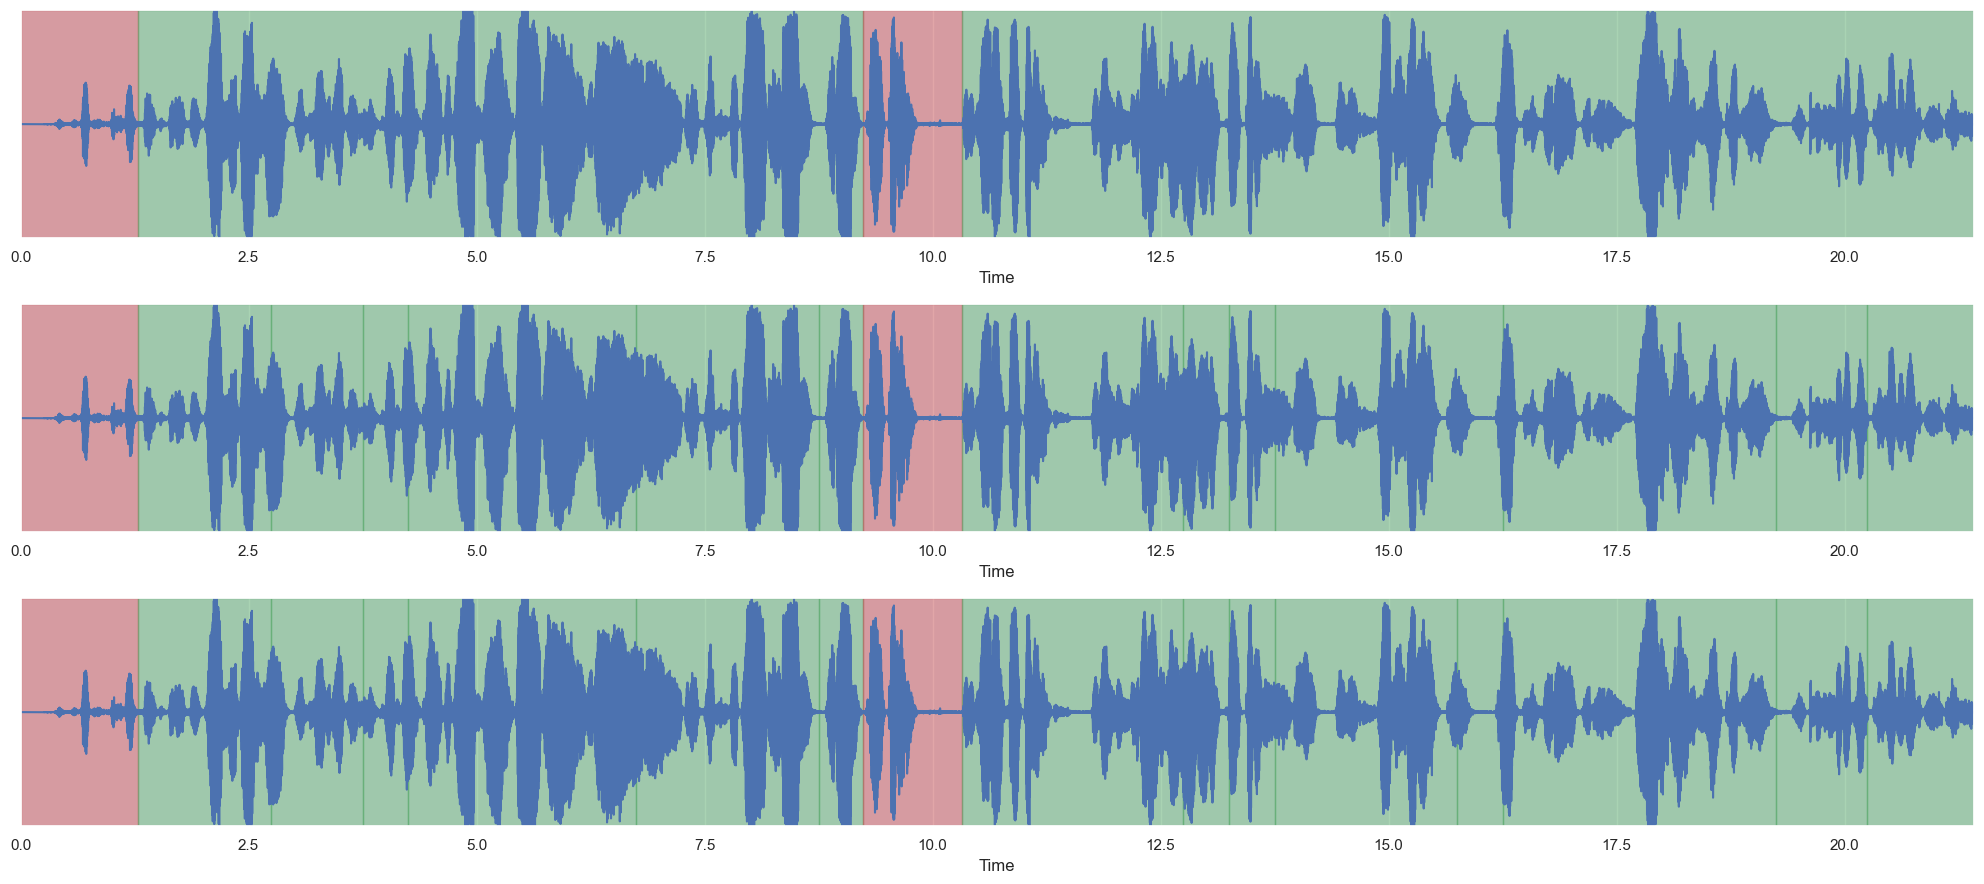

In [67]:
nrows = 3
fig, ax = plt.subplots(nrows = nrows, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 3)
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, ax = ax[0])
malaya_speech.extra.visualization.visualize_vad(y, splitted_vggvox_v2, sr, ax = ax[1])
malaya_speech.extra.visualization.visualize_vad(y, splitted_probs_quantized_vggvox_v2, sr, ax = ax[2])
fig.tight_layout()
plt.show()